In [1]:
#read the dataset/import the file
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import  re
import nltk
from gensim.models import Word2Vec
import gensim
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from keras.models import load_model # saving model for later use 

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
import pandas as pd
xl = pd.ExcelFile("final_datasets8.xlsx")
df = xl.parse( header=None, names=['ID','Level','Date','Label','Msg'], encoding='utf-8')
df

,ID,Level,Date,Label,Msg
0,450812019270046,1,20/1/2021,1,Durbi garee kanaa hundishee akka waan durbumma...
1,451178209233427,1,20/1/2021,1,Durbif gaararraan waanuma argitetti bifasheef ...
2,451092299242018,1,20/1/2021,1,Durbummaa namni qabu hundi gagamaa dha. Adduny...
3,450937722590809,1,20/1/2021,10,Durbi safuu beektu keessa kooti
4,451408632543718,1,20/1/2021,1,Durbummaa mataan haxxifannaan Hiikatu na jibbi...
...,...,...,...,...,...
12807,874138889673855_874148553006222,2,26/4/2021,40,CAALAA keenya dhugumaan caalaadha ati
12808,874138889673855_874148726339538,2,26/4/2021,40,Dhugaan karaatti hin haftu caaliyyee jabaadh...
12809,874138889673855_874152466339164,2,26/4/2021,40,Nuuf buli wan gumaachitu hin dhabin sanyii
12810,874138889673855_874152919672452,2,26/4/2021,40,Leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘


In [3]:
df.isnull().sum()

ID       0
Level    0
Date     0
Label    0
Msg      0
dtype: int64

In [4]:
##to know the number of each class data
df['Label'].value_counts()

3     1898
10    1741
4     1714
20    1559
1     1556
2     1468
40    1455
30    1421
Name: Label, dtype: int64

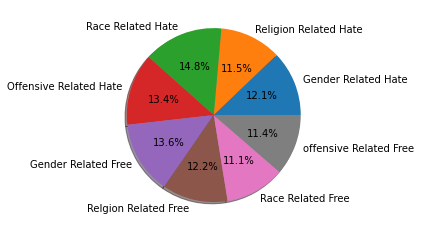

In [5]:
#data set Illustration by pie chart 
exp_vals = [  1556, 1468,  1898, 1714, 1741, 1559, 1421, 1455]
exp_labels = ["Gender Related Hate","Religion Related Hate","Race Related Hate","Offensive Related Hate","Gender Related Free","Relgion Related Free ","Race Related Free","offensive Related Free"]
plt.axis("equal")
plt.pie(exp_vals,labels=exp_labels, shadow=True, autopct='%1.1f%%',radius=1)
plt.show()

In [6]:
df.groupby('Label').describe()

Level                                             
        count      mean       std  min  25%  50%  75%  max
Label                                                     
1      1556.0  1.277635  0.447976  1.0  1.0  1.0  2.0  2.0
2      1468.0  1.369891  0.482939  1.0  1.0  1.0  2.0  2.0
3      1898.0  1.257640  0.437450  1.0  1.0  1.0  2.0  2.0
4      1714.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0
10     1741.0  1.103389  0.304554  1.0  1.0  1.0  1.0  2.0
20     1559.0  1.661321  0.473412  1.0  1.0  2.0  2.0  2.0
30     1421.0  1.046446  0.210523  1.0  1.0  1.0  1.0  2.0
40     1455.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0

In [7]:
df.drop(['ID','Level','Date'],axis='columns',inplace=True)
df

,Label,Msg
0,1,Durbi garee kanaa hundishee akka waan durbumma...
1,1,Durbif gaararraan waanuma argitetti bifasheef ...
2,1,Durbummaa namni qabu hundi gagamaa dha. Adduny...
3,10,Durbi safuu beektu keessa kooti
4,1,Durbummaa mataan haxxifannaan Hiikatu na jibbi...
...,...,...
12807,40,CAALAA keenya dhugumaan caalaadha ati
12808,40,Dhugaan karaatti hin haftu caaliyyee jabaadh...
12809,40,Nuuf buli wan gumaachitu hin dhabin sanyii
12810,40,Leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘


In [8]:
df['Label1']=df['Label']
df

,Label,Msg,Label1
0,1,Durbi garee kanaa hundishee akka waan durbumma...,1
1,1,Durbif gaararraan waanuma argitetti bifasheef ...,1
2,1,Durbummaa namni qabu hundi gagamaa dha. Adduny...,1
3,10,Durbi safuu beektu keessa kooti,10
4,1,Durbummaa mataan haxxifannaan Hiikatu na jibbi...,1
...,...,...,...
12807,40,CAALAA keenya dhugumaan caalaadha ati,40
12808,40,Dhugaan karaatti hin haftu caaliyyee jabaadh...,40
12809,40,Nuuf buli wan gumaachitu hin dhabin sanyii,40
12810,40,Leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘,40


In [9]:
df.drop(['Label'],axis='columns',inplace=True)
df

,Msg,Label1
0,Durbi garee kanaa hundishee akka waan durbumma...,1
1,Durbif gaararraan waanuma argitetti bifasheef ...,1
2,Durbummaa namni qabu hundi gagamaa dha. Adduny...,1
3,Durbi safuu beektu keessa kooti,10
4,Durbummaa mataan haxxifannaan Hiikatu na jibbi...,1
...,...,...
12807,CAALAA keenya dhugumaan caalaadha ati,40
12808,Dhugaan karaatti hin haftu caaliyyee jabaadh...,40
12809,Nuuf buli wan gumaachitu hin dhabin sanyii,40
12810,Leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘,40


# 1. Data Pre-processing 

In [10]:
# WORD COUNT:
df['word_count'] = df['Msg'].apply(lambda x : len(str(x).split()))
df.head(450)

,Msg,Label1,word_count
0,Durbi garee kanaa hundishee akka waan durbumma...,1,11
1,Durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,Durbummaa namni qabu hundi gagamaa dha. Adduny...,1,16
3,Durbi safuu beektu keessa kooti,10,5
4,Durbummaa mataan haxxifannaan Hiikatu na jibbi...,1,6
...,...,...,...
445,Shamarri durbummaa hin qabne farda luugama hin...,1,8
446,Jecha obboleettii keetin hin jenne obboloota b...,10,9
447,Durbuma Funyaan ishee hamma mokoronii ishee xi...,1,11
448,Shamarri dhaqna hin qabanne mi'a yookiin qodaa...,1,8


In [11]:
# Convert to Lower Case : 
df['Msg'] = df['Msg'].apply(lambda x : x.lower())
df['Msg'].head(2)
df

,Msg,Label1,word_count
0,durbi garee kanaa hundishee akka waan durbumma...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa dha. adduny...,1,16
3,durbi safuu beektu keessa kooti,10,5
4,durbummaa mataan haxxifannaan hiikatu na jibbi...,1,6
...,...,...,...
12807,caalaa keenya dhugumaan caalaadha ati,40,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadh...,40,8
12809,nuuf buli wan gumaachitu hin dhabin sanyii,40,7
12810,leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘,40,7


In [12]:
#Removing any date format 
df["Msg"].replace(
    {'\d+[\/:\-]\d+[\/:\-\s]*[\dAaPpMm]*' : '', '\w+\s\d+[\,]\s\d+' : ''},
    regex=True,
    inplace=True,
    )


In [13]:
# Contaction to Expansion > can't TO can not ,you'll TO you will
contractions = { 
"fkn": "fakkeenya",
"ykn": "yookaan ",
"lakk.": "lakkoofsa",
"hub.": "hubachiisa",
"fbc": "faanaa broodkaastingi korporeet ",
"obn": "oromiyaa broodkaastingi neetwoork ",
"omn": "oromiyaa miidiyaa neetwoork ",
"fb": "feesbuukii",
"qar.": "qarshii",
"bill.": "billiyoona ",
"a.l.a": "akka lakkoofsa awurooppaa",
"a.l.i": "Akka Lakkoofsa Itoophiyaa",
"kkf": "kan kana fakkaatan",
"kkf.": "kan kana fakkaatan",    
"m/b": "mana barumsaa",
"prof.": "pirofeesara",
"dr.": "dooctar",
"dn.": "daaqon",
"i/g": "itti gaafatamaa",
"ob.": "obbo",
"obb.": "obbo",
"m/murtii": "mana Murtii",
"hosp.": "hospitaala",
"mm.": "muumee Ministeeraa",
"dh.k.d": "dhaloota kiristoosin duura",
"dh.k.b": " dhaloota kiristoosin booda",
"h/bulaa": "hoorsisee Bulaa",
"q/bulaa": "qoonaan bulaa",
"A.B.O": "adda Bilisa baasa uummata oromoo ",
"pmns": "prezdaantii mootummaa naannoo somaalee",
"pmno": "prezdaantii mootummaa naannoo oromiyaa",  
"pmna": "prezdaantii mootummaa naannoo amaaraa",   
"pmng": "prezdaantii mootummaa naannoo gambeellaa", 
"pmnbg": "prezdaantii mootummaa naannoo benishaangul gumuuz",
"a.s.w": "assalaamu'aleykum warahmatullahi wabarakaatuhu",
"asw": "assalaamu'aleykum warahmatullahi wabarakaatuhu",    
"jzk": "jazakallah ",
"s.w.a": "sallallaahu aleeyhi wasallam ",    
"alh": "allah",
"b.b.o": "biiroo barnoota oromiyaa",
"k.b.r": " kolleejjii barsiisota roobee ",
"k.b.a": " kolleejjii barsiisota asallaa ",    
"k.b.j": " kolleejjii barsiisota jimmaa ",   
"k.b.y": " kolleejjii barsiisota yaa'aballoo ",  
"k.b.s": " kolleejjii barsiisota sabbataa ",       
"db.f.o": "dhaabbata fayyaa oromiyaa ",
"m.n.o": "mootummaa naannoo oromiyaa",
"mno": "mootummaa naannoo oromiyaa",    
"r.i.b": "raayyaa ittisa biyyaa",
"a.b.u.t": "adda bilisa baasa uummata tigraayi ",
"t.p.l.f": "adda bilisa baasa uummata tigraayi ",    
"kk": "kkk",
"kkk" :"kkk",
"kkkk":"kkk",
"kkkkk":"kkk",
"kkkkkk":"kkk",
"kkkkkkk":"kkk",
"hh":"hhh" ,
"hhh":"hhh",
"hhhh":"hhh",
"hhhhh":"hhh",
"hhhhhh":"hhh",
"hhhhhhh":"hhh",
"wow":"wow",
"woow":"wow",
"wooow":"wow",
"woooow":"wow",
"wooooow":"wow",
"woooooow":"wow",
"www":"wow",
"wwhoo":"wow",
"ohh":"ooh",
"oohh":"ooh",
"oohhh":"ooh",
"ohh":"ooh",
"oohh":"ooh",
"ooohhh":"ooh",
"akkka":"akka",    
"uuf":"uuf",
"uuuf":"uuf",
"uuuuf":"uuf",
"uuuuuf":"uuf",
"uuuuuuf":"uuf",
"uuff":"uuf",
"uuff":"uuf",
"uufff":"uuf",
"uuffff":"uuf",
"uufffff":"uuf",
"uuffffff":"uuf ",
"uffee":"uffee",
"uffeee":"uffee",
"ufee":"uffee",
"ufeeee":"uffee",
"baay'ee": "baayyee",
"ja'a": "jaha ",
"keecha" : "keessa",
"har'a": "harra ",
"ajaa'iba":" ajaayiba ",
"qeeyroo":"qeerroo ",
"bal'aa": "ballaa ",
"qal'oo" : "qalloo",
"keeysa":"keessa",
"worra": "warra",
"mul'ta":"Mullata" ,
"xoophiyaa":"itoophiyaa",
"yuunibaristii":"yuunivarsiitii" ,
"wonti" :" wanti",
"umrii" :" umurii",
"waa'ee" :"waayee",
"re'ee" :"rehee",
"dhalaa": "dubara",
"keeysan" :" keessan",
"qur'aana" :" quraana",
"sheeyxana" :" seexana",
"ba'e":"bahe",
"wahii":"wayii",
"macaafa":"kitaaba",
"dhagahuu":"dhaga'uu",
"dhageeysa":"dhageecha" ,
"rabbi":"waaqa",
"beetti":"beekti",
"fuundura" :" fuuldura",
"keeysa" :"  keessa",
"olkaa'uu": "olkaawuu",
"obboleeysa": "obbolessa",
"wal'aalaa":"wallaalaa" ,  
"wal'aalaan":"wallaalaan"   
}
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
df['Msg'] = df['Msg'].apply(lambda x : cont_to_exp(x))


In [14]:
df

,Msg,Label1,word_count
0,durbi garee kanaa hundishee akka waan durbumma...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa dha. adduny...,1,16
3,durbi safuu beektu keessa kooti,10,5
4,durbummaa mataan haxxifannaan hiikatu na jibbi...,1,6
...,...,...,...
12807,caalaa keenya dhugumaan caalaadha ati,40,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadh...,40,8
12809,nuuf buli wan gumaachitu hin dhabin sanyii,40,7
12810,leenca keenya dhugaa keeti jajjabee koo ❤️💚❤️💘💘💘💘,40,7


In [15]:
# remove Institutional Email
df['Msg'] = df['Msg'].apply(lambda i : re.sub(r'([A-Za-z0-9+_]+\.[A-Za-z0-9+_]+@[A-Za-z0-9+_]+\.[A-Za-z0-9+_]+\.[A-Za-z0-9+_]+)','', i))


In [16]:
# Remove normal email
df['Msg'] = df['Msg'].apply(lambda i : re.sub(r'([A-Za-z0-9+_]+@[A-Za-z0-9+_]+\.[A-Za-z0-9+_]+)','', i))

In [17]:
df.head(50)


,Msg,Label1,word_count
0,durbi garee kanaa hundishee akka waan durbumma...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa dha. adduny...,1,16
3,durbi safuu beektu keessa kooti,10,5
4,durbummaa mataan haxxifannaan hiikatu na jibbi...,1,6
5,durba jechuun haadha,10,3
6,durbi yeroo muuzii argitu maalif saree raqa ar...,1,9
7,dhiira jechuun abbaadha,10,3
8,durbaaf baaqelli karaa jalaa bilchaatti,1,5
9,dhiirri furdaan tiraasif malee firaashif hin t...,1,7


In [18]:
# Remove URL
df['Msg'] = df['Msg'].apply(lambda i : re.sub(r'https?://[^\s<>"]+|www\.[^\s<>"]+','', i))
df.head()

,Msg,Label1,word_count
0,durbi garee kanaa hundishee akka waan durbumma...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa dha. adduny...,1,16
3,durbi safuu beektu keessa kooti,10,5
4,durbummaa mataan haxxifannaan hiikatu na jibbi...,1,6


In [19]:
# Remove more than one white space 
df['Msg'] = df['Msg'].apply(lambda d : " ".join(d.split()))


In [20]:
# Remove HTML tags 
from bs4 import BeautifulSoup
df['Msg'] = df['Msg'].apply(lambda x : BeautifulSoup(x, 'lxml').get_text())


In [21]:
# Removing special charcter and Puncutation marks & number 
spec_chars = ["!","-",'"',"#","%","&","(",")", 
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
            "`","{","|","}","~","–"]
for char in spec_chars:
    df['Msg'] = df['Msg'].str.replace(char, ' ')

In [22]:
# Replacing ’ with apostrophe(') this is not work pls find and replace from excell 
spec_chars2 = ["’"]
for chars in spec_chars2:
    df['Msg'] = df['Msg'].str.replace(chars, " ' ")

In [23]:
# remove Stop word 
read=open("stopword.txt",encoding='latin',mode='r')
readfirst=read.read()
def remove_stop_word(x):
    filtered_words = [word for word in x.split() if word not in readfirst]
    return " ".join(filtered_words)
df['Msg'] = df['Msg'].apply(lambda x : remove_stop_word(x))
df


,Msg,Label1,word_count
0,durbi garee hundishee durbummaa qabduu dhiira ...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa addunyaan m...,1,16
3,durbi safuu beektu kooti,10,5
4,durbummaa mataan haxxifannaan hiikatu jibbisiisam,1,6
...,...,...,...
12807,caalaa dhugumaan caalaadha,40,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadhu ...,40,8
12809,buli wan gumaachitu hin dhabin sanyii,40,7
12810,leenca dhugaa keeti jajjabee ❤️💚❤️💘💘💘💘,40,7


In [24]:
df

,Msg,Label1,word_count
0,durbi garee hundishee durbummaa qabduu dhiira ...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa addunyaan m...,1,16
3,durbi safuu beektu kooti,10,5
4,durbummaa mataan haxxifannaan hiikatu jibbisiisam,1,6
...,...,...,...
12807,caalaa dhugumaan caalaadha,40,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadhu ...,40,8
12809,buli wan gumaachitu hin dhabin sanyii,40,7
12810,leenca dhugaa keeti jajjabee ❤️💚❤️💘💘💘💘,40,7


In [25]:
# Removing Emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df['Msg'] = df['Msg'].apply(lambda x :  remove_emoji(x))
df

,Msg,Label1,word_count
0,durbi garee hundishee durbummaa qabduu dhiira ...,1,11
1,durbif gaararraan waanuma argitetti bifasheef ...,1,7
2,durbummaa namni qabu hundi gagamaa addunyaan m...,1,16
3,durbi safuu beektu kooti,10,5
4,durbummaa mataan haxxifannaan hiikatu jibbisiisam,1,6
...,...,...,...
12807,caalaa dhugumaan caalaadha,40,5
12808,dhugaan karaatti hin haftu caaliyyee jabaadhu ...,40,8
12809,buli wan gumaachitu hin dhabin sanyii,40,7
12810,leenca dhugaa keeti jajjabee,40,7


In [26]:
df.drop(['word_count'],axis='columns',inplace=True)
df

,Msg,Label1
0,durbi garee hundishee durbummaa qabduu dhiira ...,1
1,durbif gaararraan waanuma argitetti bifasheef ...,1
2,durbummaa namni qabu hundi gagamaa addunyaan m...,1
3,durbi safuu beektu kooti,10
4,durbummaa mataan haxxifannaan hiikatu jibbisiisam,1
...,...,...
12807,caalaa dhugumaan caalaadha,40
12808,dhugaan karaatti hin haftu caaliyyee jabaadhu ...,40
12809,buli wan gumaachitu hin dhabin sanyii,40
12810,leenca dhugaa keeti jajjabee,40


In [27]:
cleaneddf=df
cleaneddf

,Msg,Label1
0,durbi garee hundishee durbummaa qabduu dhiira ...,1
1,durbif gaararraan waanuma argitetti bifasheef ...,1
2,durbummaa namni qabu hundi gagamaa addunyaan m...,1
3,durbi safuu beektu kooti,10
4,durbummaa mataan haxxifannaan hiikatu jibbisiisam,1
...,...,...
12807,caalaa dhugumaan caalaadha,40
12808,dhugaan karaatti hin haftu caaliyyee jabaadhu ...,40
12809,buli wan gumaachitu hin dhabin sanyii,40
12810,leenca dhugaa keeti jajjabee,40


In [28]:
df['Msg'] = df['Msg'].str.replace('\d+', '')
df['Msg'].str.findall('\w{2,}').str.join(' ')

0        durbi garee hundishee durbummaa qabduu dhiira ...
1        durbif gaararraan waanuma argitetti bifasheef ...
2        durbummaa namni qabu hundi gagamaa addunyaan m...
3                                 durbi safuu beektu kooti
4        durbummaa mataan haxxifannaan hiikatu jibbisiisam
                               ...                        
12807                           caalaa dhugumaan caalaadha
12808    dhugaan karaatti hin haftu caaliyyee jabaadhu ...
12809                buli wan gumaachitu hin dhabin sanyii
12810                         leenca dhugaa keeti jajjabee
12811                               jiraadhu leenca keenya
Name: Msg, Length: 12812, dtype: object

In [29]:
# cleaneddf['Msg'] = df["Msg"].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))


In [30]:
df.to_excel(r'mycleaned_data_set.xlsx', sheet_name='my_cleaned_data-set', index = False)


In [31]:
def plot_word_cloud(data):
    words=""
    for sent in data:
        sent= str(sent)
        sent=sent.lower()
        tokens= sent.split()
        words +=" ".join(tokens)+" "
    plt.figure(figsize=(15,12))
    wordcloud= WordCloud(width=800,height=800, background_color='aqua').generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')


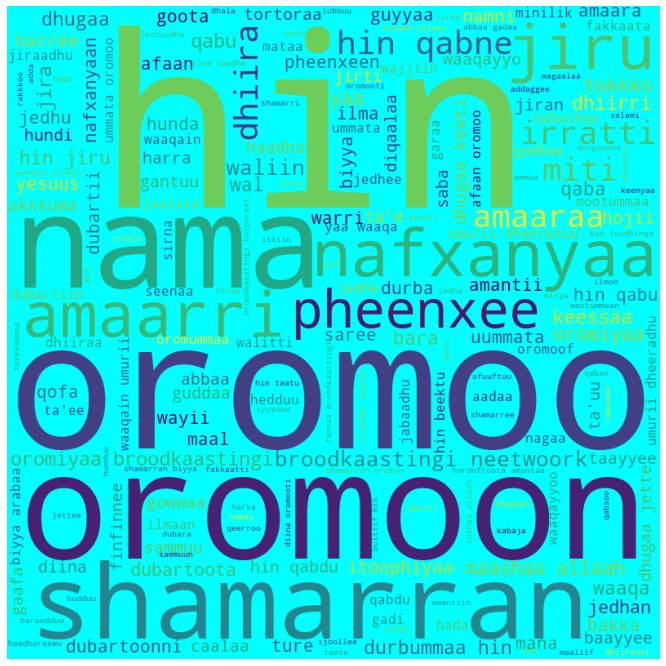

In [32]:
plot_word_cloud(cleaneddf.Msg)

In [33]:
##to know the number of each class data
df['Label1'].value_counts()

3     1898
10    1741
4     1714
20    1559
1     1556
2     1468
40    1455
30    1421
Name: Label1, dtype: int64

In [34]:
#Replacing values 
#replace_values = {1:1, 10:2, 2:3,20:4,3:5,30:6,4:7,40:8 }     
#df = df.replace({"Label1": replace_values})  
#df

In [35]:
##to know the number of each class data
#df['Label1'].value_counts()

In [36]:
#train and test split
from sklearn.model_selection import train_test_split
X=df['Msg']
Y=df['Label1']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=32)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print('total number of row in dataframe  '+ str(len(X_train)+len(X_test)))

10249
2563
10249
2563
total number of row in dataframe  12812


In [37]:
#Tokenizing 
from keras.preprocessing.text import Tokenizer
num_words = 10000 # this means 15000 unique words can be taken 
tokenizer=Tokenizer(num_words)
df_total = pd.concat([X_train, X_test], axis = 0)
tokenizer.fit_on_texts(df_total)

In [38]:
vocab_size=len(tokenizer.word_index) # this is whole unique words in our corpus
vocab_size
total_message=df_total
tokenizer.fit_on_texts(total_message)
max_length=max([len(s.split()) for s in total_message])
#define vocabulary size
vocab_size=len(tokenizer.word_index)+1
print('longest sentence is data set have  ' + str(max_length))
print('Unique number of word in dataset '+str(vocab_size))

longest sentence is data set have  48
Unique number of word in dataset 20700


In [39]:
#pad_sequences
from keras.preprocessing.sequence import pad_sequences
X_trains =tokenizer.texts_to_sequences(X_train)
X_trains_pads=pad_sequences(X_trains,maxlen=max_length,padding='post', truncating='post')
X_tests = tokenizer.texts_to_sequences(X_test)
X_test_pads = pad_sequences(X_tests, maxlen = max_length, padding = 'post',truncating='post')


In [40]:
# size checking and padding visualization
print(X_trains_pads.shape)
print(X_test_pads.shape)

print(X_trains[5])
print(X_trains_pads[5])


(10249, 48)
(2563, 48)
[335, 30, 102]
[335  30 102   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]


In [41]:
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import os, re, csv, math, codecs
print('load word embedding...')
embedding_index = {}
#tokenizer = RegexpTokenizer(r'\w+')
f = codecs.open('C:/Users/Tashe/myfinalcode/8class of classification/BYML/myword2vecfinal.txt', encoding='unicode_escape')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float64')
    embedding_index[word] = coefs
f.close()
print('found %s word vectors' % len(embedding_index))

0it [00:00, ?it/s]

load word embedding...


45593it [00:05, 8850.61it/s]

found 45593 word vectors


In [42]:
embed_dim=100

In [43]:

MAX_NB_WORDS = 100000
word_index = tokenizer.word_index
words_not_found = []
nb_words = min(MAX_NB_WORDS, len(word_index)+1)
embedding_matrix = np.zeros((nb_words, embed_dim))

for word, i in word_index.items():
    if(i>=nb_words):
        continue
    embedding_vector = embedding_index.get(word)
    if(embedding_vector is not None) and len(embedding_vector)>0:
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('Number of null words embeddings found %d' % np.sum(np.sum(embedding_matrix, axis=1)==0))

Number of null words embeddings found 1378


In [44]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# CNN Algorithm 

In [45]:
#Parameters 
embeeding_dims=100
filters=128
hidden_dims=128
kernel_size=3

In [46]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [47]:
# by CNN algorithm 
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense,Embedding,Flatten
from keras.layers import Embedding
from keras.layers import Conv1D,GlobalMaxPooling1D
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense,Dropout,Activation,SpatialDropout1D
from keras.layers.embeddings import Embedding
cnnmodel = Sequential()
cnnmodel.add(Embedding(vocab_size, embed_dim, input_length=max_length, weights=[embedding_matrix], trainable=True))
cnnmodel.add(Dropout(0.6))
cnnmodel.add(Conv1D(filters, kernel_size,padding='same',strides=1))
cnnmodel.add(Dropout(0.2))
cnnmodel.add(BatchNormalization())
cnnmodel.add(Activation('relu'))
cnnmodel.add(GlobalMaxPooling1D())
cnnmodel.add(Dropout(0.5))
cnnmodel.add(Dense(41, activation='softmax'))
cnnmodel.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
print(cnnmodel.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 48, 100)           2070000   
_________________________________________________________________
dropout (Dropout)            (None, 48, 100)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 48, 128)           38528     
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 128)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 128)           512       
_________________________________________________________________
activation (Activation)      (None, 48, 128)           0         
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0

In [48]:
# train the model 
history=cnnmodel.fit(X_trains_pads, y_train, batch_size=64, epochs=15, validation_data=(X_test_pads,y_test), verbose=1, callbacks=[early_stopping])


Epoch 1/15
161/161 [==============================] - 24s 139ms/step - loss: 5.9872 - accuracy: 0.2163 - val_loss: 1.5422 - val_accuracy: 0.6816
Epoch 2/15
161/161 [==============================] - 22s 138ms/step - loss: 1.6793 - accuracy: 0.4694 - val_loss: 1.1578 - val_accuracy: 0.7335
Epoch 3/15
161/161 [==============================] - 21s 130ms/step - loss: 1.2577 - accuracy: 0.5557 - val_loss: 0.9549 - val_accuracy: 0.7511
Epoch 4/15
161/161 [==============================] - 18s 114ms/step - loss: 1.1072 - accuracy: 0.6074 - val_loss: 0.8526 - val_accuracy: 0.7682
Epoch 5/15
161/161 [==============================] - 21s 128ms/step - loss: 0.9727 - accuracy: 0.6598 - val_loss: 0.7868 - val_accuracy: 0.7667
Epoch 6/15
161/161 [==============================] - 25s 155ms/step - loss: 0.9179 - accuracy: 0.6604 - val_loss: 0.7387 - val_accuracy: 0.7757
Epoch 7/15
161/161 [==============================] - 23s 143ms/step - loss: 0.8398 - accuracy: 0.6972 - val_loss: 0.7080 - val_ac

In [49]:
scores = cnnmodel.evaluate(X_test_pads, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

81/81 [==============================] - 1s 15ms/step - loss: 0.5730 - accuracy: 0.8143
Accuracy: 81.43%


In [50]:
from sklearn.metrics import classification_report

y_pred = cnnmodel.predict(X_test_pads, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

41/41 [==============================] - 2s 26ms/step
              precision    recall  f1-score   support

           1       0.73      0.82      0.77       313
           2       0.79      0.68      0.73       269
           3       0.81      0.86      0.83       374
           4       0.78      0.93      0.85       344
          10       0.86      0.73      0.79       379
          20       0.83      0.79      0.81       300
          30       0.88      0.75      0.81       275
          40       0.86      0.94      0.90       309

    accuracy                           0.81      2563
   macro avg       0.82      0.81      0.81      2563
weighted avg       0.82      0.81      0.81      2563



In [51]:
history.history

{'loss': [3.692107915878296,
  1.5388238430023193,
  1.2066519260406494,
  1.0815856456756592,
  0.9538697600364685,
  0.8994553089141846,
  0.8390975594520569,
  0.7925310730934143,
  0.7467262148857117,
  0.7155424356460571,
  0.6857143640518188,
  0.6654362082481384,
  0.6401045322418213,
  0.6223076581954956,
  0.6003868579864502],
 'accuracy': [0.31749439239501953,
  0.4945848286151886,
  0.5769343376159668,
  0.6143038272857666,
  0.6631866693496704,
  0.6780173778533936,
  0.697141170501709,
  0.7204605340957642,
  0.7347058057785034,
  0.7482681274414062,
  0.7547077536582947,
  0.757537305355072,
  0.7724655866622925,
  0.7766611576080322,
  0.7906137108802795],
 'val_loss': [1.5422359704971313,
  1.1577779054641724,
  0.9549145698547363,
  0.8525761365890503,
  0.7867975831031799,
  0.73874831199646,
  0.7080491185188293,
  0.6753232479095459,
  0.6474091410636902,
  0.6327363848686218,
  0.616285502910614,
  0.6072391867637634,
  0.5969683527946472,
  0.5805355310440063,
  0

In [52]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train loss' , 'Val loss'], loc='upper left')
  plt.show()


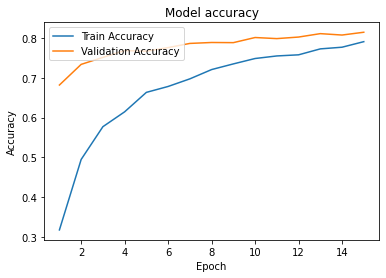

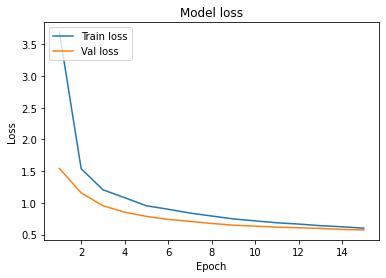

In [53]:
plot_learningCurve(history, 15)


# Prediction Test

In [54]:
twt = [ "durba gabaabduu hin fuudhinaa"]
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, padding='post', maxlen=max_length, dtype='int64', value=0)
print(twt)
sentiment = cnnmodel.predict(twt,batch_size=1,verbose = 1)[0]
if(np.argmax(sentiment) == 1):
    print("Gender reated hate ")
elif (np.argmax(sentiment) == 10):
    print("Gender Related Free")
elif (np.argmax(sentiment) == 2):
    print("Religion Related Hate")
elif (np.argmax(sentiment) == 20):
    print("Religion Related Free")
elif (np.argmax(sentiment) == 3):
    print("Race Related Hate")
elif (np.argmax(sentiment) == 30):
    print("Race Related Free")
elif (np.argmax(sentiment) == 4):
    print("Offensive Related Hate")
elif (np.argmax(sentiment) == 40):
    print("Offensive Related Not Hate")


[[ 47 237   1 272   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]]
1/1 [==============================] - 0s 365ms/step
Gender reated hate 


# Saving Model for Later use 

In [55]:
model=cnnmodel

In [56]:
#save model 
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model folder/8pretcnnmodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model folder/8pretcnnmodel.h5")
print("Saved model to disk")

Saved model to disk


In [57]:
# load json and create model
from keras.models import model_from_json
json_file = open("model folder/8pretcnnmodel.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model folder/8pretcnnmodel.h5")
print("Loaded model from disk")

Loaded model from disk
